<a href="https://colab.research.google.com/github/tomhyhan/noodles/blob/main/pasta_classification.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [33]:
%load_ext autoreload
%autoreload 2

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


In [34]:
from google.colab import userdata
from google.colab import auth

auth.authenticate_user()
token = userdata.get('token')
username = userdata.get('username')
repo_name = "noodles"

In [35]:
import os

!git clone https://github.com/tomhyhan/{repo_name}.git

if os.getcwd() != f"/content/{repo_name}":
    %cd {repo_name}
!git pull
!pwd


Cloning into 'noodles'...
remote: Enumerating objects: 260, done.
remote: Counting objects: 100% (16/16), done.
remote: Compressing objects: 100% (13/13), done.
remote: Total 260 (delta 5), reused 8 (delta 3), pack-reused 244 (from 1)
Receiving objects: 100% (260/260), 1.80 MiB | 4.01 MiB/s, done.
Resolving deltas: 100% (140/140), done.
remote: Enumerating objects: 5, done.
remote: Counting objects: 100% (5/5), done.
remote: Compressing objects: 100% (3/3), done.
remote: Total 3 (delta 1), reused 0 (delta 0), pack-reused 0 (from 0)
Unpacking objects: 100% (3/3), 433.89 KiB | 1.69 MiB/s, done.
From https://github.com/tomhyhan/noodles
   1b5d733..64fcc65  main       -> origin/main
Updating 1b5d733..64fcc65
Fast-forward
 pasta_classification.ipynb | 3874 ++++++++++++++++++++++++++++++++++++++++++++++++++++++++++------
 1 file changed, 3524 insertions(+), 350 deletions(-)
/content/noodles


In [36]:
from google.colab import drive

drive.mount("/content/drive")

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [37]:
import os
import sys

GOOGLE_DRIVE_PATH_AFTER_MYDRIVE = "noodles"

GOOGLE_DRIVE_PATH = os.path.join("..", "drive", "My Drive", GOOGLE_DRIVE_PATH_AFTER_MYDRIVE)


In [38]:

from model.utils import test_colab
test_colab()


Hello Colab! from Noodles ha


In [39]:
!pip install torchinfo
!pip install imagehash

In [41]:
import numpy as np
import pandas as pd
import torch
from torch import nn
from torch.utils.data import DataLoader, Dataset
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split, StratifiedKFold


from config.config_manager import ConfigManager
from collections import Counter
from model.data_model import PastaData, create_train_transforms, create_test_transforms
from model.train import trainer, create_model
from model.utils import reset_seed, save_model
from model.data import CLASS_ENCODER, create_csv
from model.viz import class_imbalance, draw_loss, draw_train_val_accuracy

In [42]:
config_manager = ConfigManager("./config/config.yml")

SEED = config_manager.config.seed

In [43]:
reset_seed(SEED)

In [44]:
image_path = os.path.join(GOOGLE_DRIVE_PATH, "images")
csv_file_path = os.path.join(GOOGLE_DRIVE_PATH, "pasta_data.csv")

if not os.path.exists(csv_file_path):
    create_csv(image_path, csv_file_path)

In [45]:
data = pd.read_csv(os.path.join(GOOGLE_DRIVE_PATH, "./pasta_data.csv"))
image_paths, labels = data["img_path"], data["label"]

X, test_data, y, test_label = train_test_split(image_paths.values, labels.values, train_size=0.9, random_state=SEED, shuffle=True, stratify=labels)

5033 1258
=== ../drive/My Drive/noodles/./swin/swin_k_fold_1.pt exist! ===
Resume Training from previous check point


/content/noodles/model/utils.py:29: FutureWarning: You are using `torch.load` with `weights_only=False` (the current default value), which uses the default pickle module implicitly. It is possible to construct malicious pickle data which will execute arbitrary code during unpickling (See https://github.com/pytorch/pytorch/blob/main/SECURITY.md#untrusted-models for more details). In a future release, the default value for `weights_only` will be flipped to `True`. This limits the functions that could be executed during unpickling. Arbitrary objects will no longer be allowed to be loaded via this mode unless they are explicitly allowlisted by the user via `torch.serialization.add_safe_globals`. We recommend you start setting `weights_only=True` for any use case where you don't have full control of the loaded file. Please open an issue on GitHub for any issues related to this experimental feature.
  checkpoint = torch.load(out_file, map_location="cpu")


Epoch 4/10:   0%|          | 0/150 [00:00<?, ?it/s]

Learning Rate: [4.864104326281614e-05]
Epoch 4 Loss: 1.4503004848957062 Train Accuracy: 0.9066             Validation Accuracy: 0.8558333333333333
Global gradient norm: 3.150134975259283


Epoch 5/10:   0%|          | 0/150 [00:00<?, ?it/s]

Learning Rate: [9.952989206823863e-05]
Epoch 5 Loss: 1.4515374791622162 Train Accuracy: 0.8934             Validation Accuracy: 0.8258333333333333
Global gradient norm: 5.085558861703421


Epoch 6/10:   0%|          | 0/150 [00:00<?, ?it/s]

Learning Rate: [9.178746733646638e-05]
Epoch 6 Loss: 1.385844285885493 Train Accuracy: 0.9026             Validation Accuracy: 0.8325
Global gradient norm: 4.215074650129505


Epoch 7/10:   0%|          | 0/150 [00:00<?, ?it/s]

Learning Rate: [6.706766368180335e-05]
Epoch 7 Loss: 1.3530984032154083 Train Accuracy: 0.9332             Validation Accuracy: 0.8508333333333333
Global gradient norm: 2.4855988626198107


Epoch 8/10:   0%|          | 0/150 [00:00<?, ?it/s]

Learning Rate: [3.556912843420131e-05]
Epoch 8 Loss: 1.29977370262146 Train Accuracy: 0.9572             Validation Accuracy: 0.8558333333333333
Global gradient norm: 3.308031964164634


Epoch 9/10:   0%|          | 0/150 [00:00<?, ?it/s]

Learning Rate: [9.802221656231811e-06]
Epoch 9 Loss: 1.2851126817862193 Train Accuracy: 0.9716             Validation Accuracy: 0.8691666666666666
Global gradient norm: 2.3694276584687826


Epoch 10/10:   0%|          | 0/150 [00:00<?, ?it/s]

Learning Rate: [8.567333007890797e-10]
Epoch 10 Loss: 1.1924198695023855 Train Accuracy: 0.974             Validation Accuracy: 0.8733333333333333
Global gradient norm: 1.3688803898530786
End of Training for swin Model 1-fold
best accuracy: 0.8733333333333333


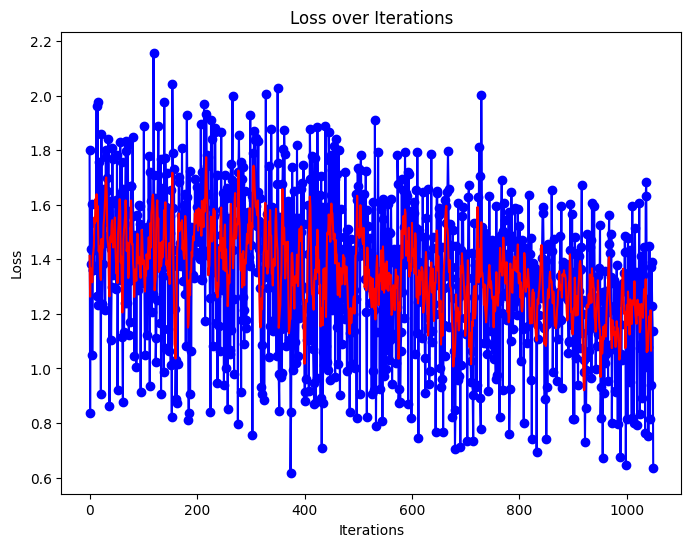

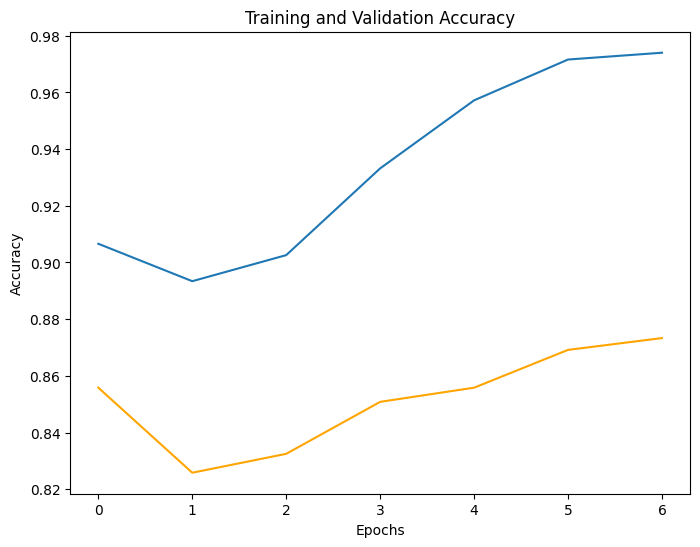

5033 1258
=== ../drive/My Drive/noodles/./swin/swin_k_fold_2.pt exist! ===
Resume Training from previous check point


Epoch 4/10:   0%|          | 0/150 [00:00<?, ?it/s]

Learning Rate: [4.864104326281614e-05]
Epoch 4 Loss: 1.4029613316059113 Train Accuracy: 0.9074             Validation Accuracy: 0.8466666666666667
Global gradient norm: 5.364977458369085


Epoch 5/10:   0%|          | 0/150 [00:00<?, ?it/s]

Learning Rate: [9.952989206823863e-05]
Epoch 5 Loss: 1.4496191477775573 Train Accuracy: 0.9014             Validation Accuracy: 0.8166666666666667
Global gradient norm: 4.634829287705819


Epoch 6/10:   0%|          | 0/150 [00:00<?, ?it/s]

Learning Rate: [9.178746733646638e-05]
Epoch 6 Loss: 1.4280904614925385 Train Accuracy: 0.933             Validation Accuracy: 0.8408333333333333
Global gradient norm: 3.712139387133584


Epoch 7/10:   0%|          | 0/150 [00:00<?, ?it/s]

Learning Rate: [6.706766368180335e-05]
Epoch 7 Loss: 1.3667914791901907 Train Accuracy: 0.9492             Validation Accuracy: 0.86
Global gradient norm: 4.20959448681239


Epoch 8/10:   0%|          | 0/150 [00:00<?, ?it/s]

Learning Rate: [3.556912843420131e-05]
Epoch 8 Loss: 1.2746001076698303 Train Accuracy: 0.9672             Validation Accuracy: 0.8616666666666667
Global gradient norm: 4.713668344316414


Epoch 9/10:   0%|          | 0/150 [00:00<?, ?it/s]

Learning Rate: [9.802221656231811e-06]
Epoch 9 Loss: 1.2055830574035644 Train Accuracy: 0.9718             Validation Accuracy: 0.8691666666666666
Global gradient norm: 3.3968760041940764


Epoch 10/10:   0%|          | 0/150 [00:00<?, ?it/s]

Learning Rate: [8.567333007890797e-10]
Epoch 10 Loss: 1.2463642259438832 Train Accuracy: 0.9738             Validation Accuracy: 0.8716666666666667
Global gradient norm: 3.3786149587414416
End of Training for swin Model 2-fold
best accuracy: 0.8716666666666667


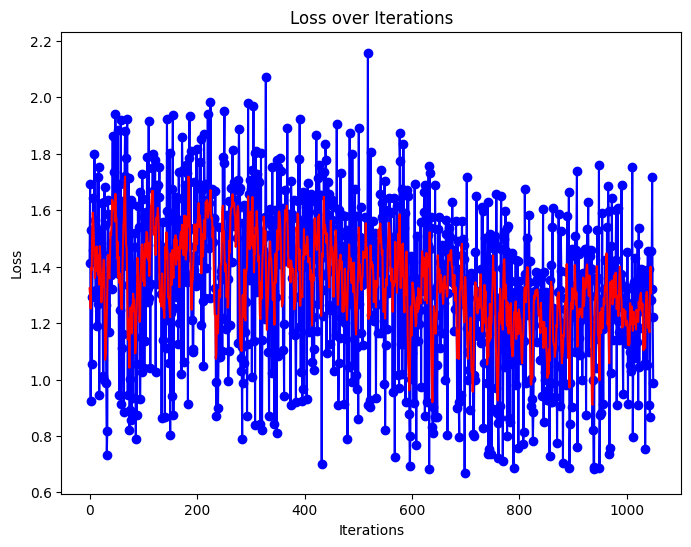

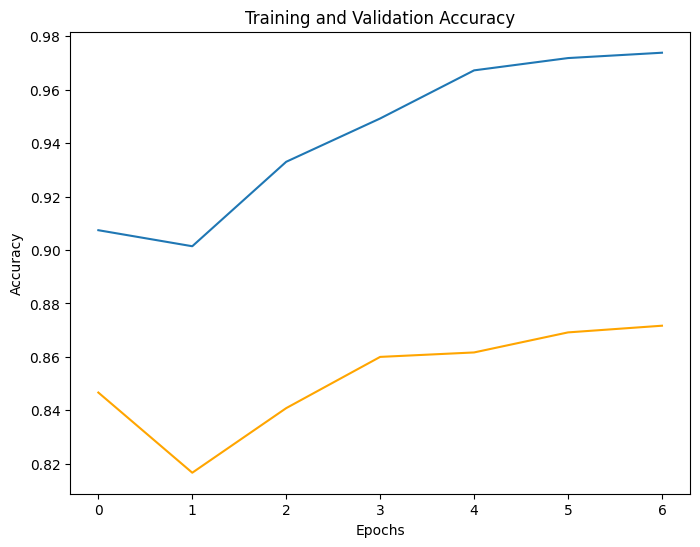

5033 1258
=== ../drive/My Drive/noodles/./swin/swin_k_fold_3.pt exist! ===
Resume Training from previous check point


Epoch 4/10:   0%|          | 0/150 [00:00<?, ?it/s]

Learning Rate: [4.864104326281614e-05]
Epoch 4 Loss: 1.4305528855323792 Train Accuracy: 0.9038             Validation Accuracy: 0.8208333333333333
Global gradient norm: 2.3915325236285008


Epoch 5/10:   0%|          | 0/150 [00:00<?, ?it/s]

Learning Rate: [9.952989206823863e-05]
Epoch 5 Loss: 1.4943286069234212 Train Accuracy: 0.899             Validation Accuracy: 0.81
Global gradient norm: 3.847465649093814


Epoch 6/10:   0%|          | 0/150 [00:00<?, ?it/s]

Learning Rate: [9.178746733646638e-05]
Epoch 6 Loss: 1.3747018114725749 Train Accuracy: 0.9236             Validation Accuracy: 0.8291666666666667
Global gradient norm: 4.116257980159029


Epoch 7/10:   0%|          | 0/150 [00:00<?, ?it/s]

Learning Rate: [6.706766368180335e-05]
Epoch 7 Loss: 1.3347671473026275 Train Accuracy: 0.9528             Validation Accuracy: 0.8308333333333333
Global gradient norm: 3.4952825122368156


Epoch 8/10:   0%|          | 0/150 [00:00<?, ?it/s]

Learning Rate: [3.556912843420131e-05]
Epoch 8 Loss: 1.2994951899846394 Train Accuracy: 0.9662             Validation Accuracy: 0.8475
Global gradient norm: 2.9596805512403215


Epoch 9/10:   0%|          | 0/150 [00:00<?, ?it/s]

Learning Rate: [9.802221656231811e-06]
Epoch 9 Loss: 1.2362744530042014 Train Accuracy: 0.9738             Validation Accuracy: 0.8525
Global gradient norm: 2.7667386611216336


Epoch 10/10:   0%|          | 0/150 [00:00<?, ?it/s]

Learning Rate: [8.567333007890797e-10]
Epoch 10 Loss: 1.2244111069043477 Train Accuracy: 0.9744             Validation Accuracy: 0.8558333333333333
Global gradient norm: 4.249562102946453
End of Training for swin Model 3-fold
best accuracy: 0.8558333333333333


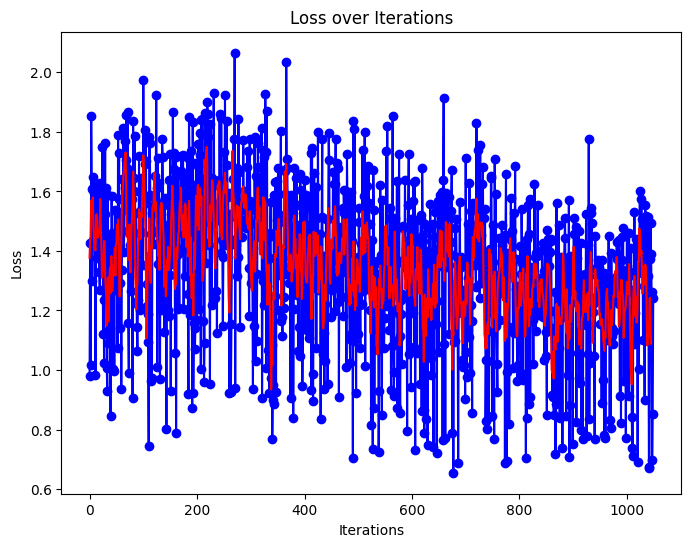

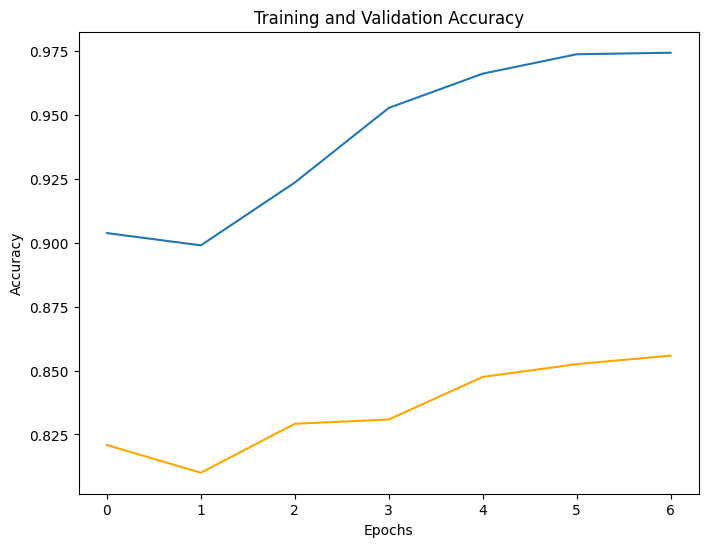

5033 1258
=== ../drive/My Drive/noodles/./swin/swin_k_fold_4.pt exist! ===
Resume Training from previous check point


Epoch 4/10:   0%|          | 0/150 [00:00<?, ?it/s]

Learning Rate: [4.864104326281614e-05]
Epoch 4 Loss: 1.455935780207316 Train Accuracy: 0.9048             Validation Accuracy: 0.8366666666666667
Global gradient norm: 5.9468590573602365


Epoch 5/10:   0%|          | 0/150 [00:00<?, ?it/s]

Learning Rate: [9.952989206823863e-05]
Epoch 5 Loss: 1.4567382760842642 Train Accuracy: 0.9038             Validation Accuracy: 0.8158333333333333
Global gradient norm: 3.814409354514908


Epoch 6/10:   0%|          | 0/150 [00:00<?, ?it/s]

Learning Rate: [9.178746733646638e-05]
Epoch 6 Loss: 1.4393900736172993 Train Accuracy: 0.9134             Validation Accuracy: 0.8066666666666666
Global gradient norm: 3.705376242511854


Epoch 7/10:   0%|          | 0/150 [00:00<?, ?it/s]

Learning Rate: [6.706766368180335e-05]
Epoch 7 Loss: 1.3645155870914458 Train Accuracy: 0.9514             Validation Accuracy: 0.8475
Global gradient norm: 2.8158231490835957


Epoch 8/10:   0%|          | 0/150 [00:00<?, ?it/s]

Learning Rate: [3.556912843420131e-05]
Epoch 8 Loss: 1.2862166774272918 Train Accuracy: 0.9644             Validation Accuracy: 0.8575
Global gradient norm: 2.2804297459970684


Epoch 9/10:   0%|          | 0/150 [00:00<?, ?it/s]

Learning Rate: [9.802221656231811e-06]
Epoch 9 Loss: 1.2037821483612061 Train Accuracy: 0.972             Validation Accuracy: 0.8658333333333333
Global gradient norm: 2.919511177156681


Epoch 10/10:   0%|          | 0/150 [00:00<?, ?it/s]

Learning Rate: [8.567333007890797e-10]
Epoch 10 Loss: 1.2362462536493937 Train Accuracy: 0.9778             Validation Accuracy: 0.87
Global gradient norm: 2.178688114913958
End of Training for swin Model 4-fold
best accuracy: 0.87


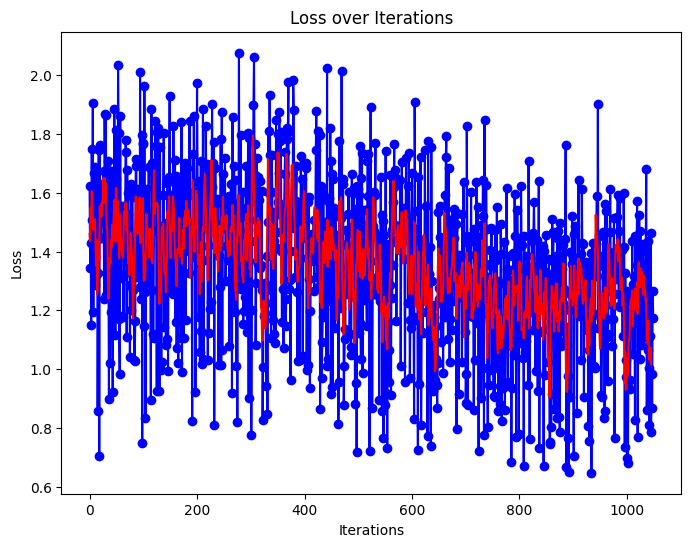

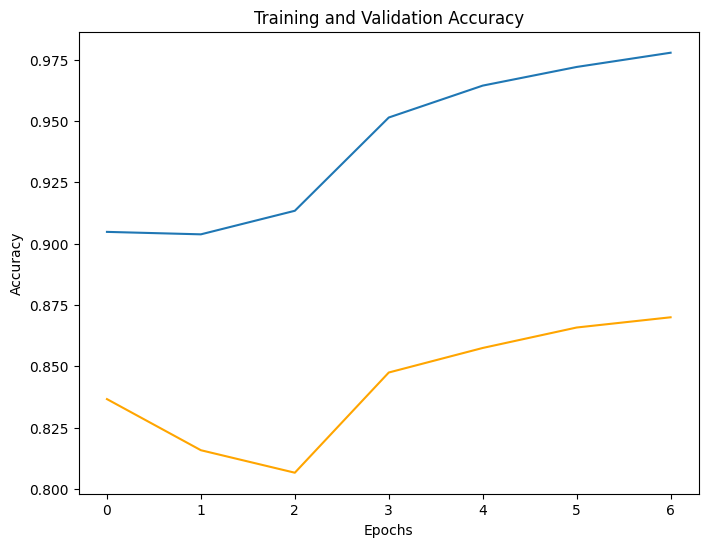

current_model_accuracies [0.8733333333333333, 0.8716666666666667, 0.8558333333333333, 0.87]


In [46]:
k_fold = StratifiedKFold(n_splits=5, random_state=SEED, shuffle=True)
models = ['maxvit']

# N=100
# perm_indices = np.random.permutation(N)
# X = X[perm_indices]
# y = y[perm_indices]

for model_name in models:
    current_model_accuracies = []
    for k_id, (train_i, val_i) in enumerate(k_fold.split(X,y)):
        # if k_id in [0]:
        #     continue
        print(len(train_i), len(val_i))
        train_set = X[train_i]
        train_label_set = y[train_i]

        val_set = X[val_i]
        val_label_set = y[val_i]

        model_config = config_manager.config[model_name]
        lr = config_manager.config.lr
        num_epochs = config_manager.config.num_epochs
        num_classes = config_manager.config.num_classes

        device = 'cuda' if torch.cuda.is_available() else 'cpu'

        train_transform = create_train_transforms()
        test_transform = create_test_transforms()

        train_data = PastaData(train_set, train_label_set, transform_list=train_transform)
        train_data_accuracy = PastaData(train_set, train_label_set, transform_list=test_transform)
        val_data = PastaData(val_set, val_label_set, transform_list=test_transform)

        train_loader = DataLoader(train_data, batch_size=model_config.batch_size, shuffle=False, drop_last=True)
        train_loader_accuracy = DataLoader(train_data_accuracy, batch_size=model_config.batch_size, shuffle=False, drop_last=True)
        val_loader = DataLoader(val_data, batch_size=model_config.batch_size, shuffle=False, drop_last=True)

        model = create_model(model_name, num_classes)
        model.to(device)

        result_dir = os.path.join(GOOGLE_DRIVE_PATH, model_config.output_dir)
        os.makedirs(result_dir, exist_ok=True)

        out_file = os.path.join(result_dir, f"{model_name}_k_fold_{k_id}.pt")

        resume = False
        if os.path.exists(out_file):
            print(f"=== {out_file} exist! ===")
            resume = True

        #  need to make dataframe from images
        loss_history, train_accuracy_history, \
        val_accuracy_history, best_accuracy, model, optimizer, scaler, end_epoch = trainer(
            model,
            train_loader,
            train_loader_accuracy,
            val_loader,
            num_epochs=num_epochs,
            lr=lr,
            model_config=model_config,
            device=device,
            resume=resume,
            out_file=out_file,
            num_classes=num_classes
        )


        current_model_accuracies.append(best_accuracy)
        print(f"End of Training for {model_name} Model {k_id}-fold")
        print(f"best accuracy: {best_accuracy}")

        save_model(model, optimizer, scaler, end_epoch, out_file, best_accuracy)
        # torch.save(best_params, os.path.join(result_dir, f"{model_name}_k_fold_{k_id}.pt"))
        draw_loss(loss_history)
        draw_train_val_accuracy(train_accuracy_history, val_accuracy_history)

    print("current_model_accuracies", current_model_accuracies)


        # avg_accuracy = torch.mean(fold_accuracies)
        # std_accuracy = torch.std(fold_accuracies)

        # general plan
        # 1. save best accuracies
        # 2. compare with different models
        # 3. train on full dataset with best performing model
        # 4. make inference


In [ ]:
from pathlib import Path
import glob

In [47]:
models = ['swin']
for model_name in models:
    model_config = config_manager.config[model_name]
    result_dir = os.path.join(GOOGLE_DRIVE_PATH, model_config.output_dir)
    output_dir = Path(result_dir)
    checkpt_paths =  glob.glob(os.path.join(output_dir, "swin_k_fold_*.pt"))
    accuracy_list = []
    for checkpt_path in checkpt_paths:
        checkpoint = torch.load(checkpt_path, map_location='cpu')
        accuracy_list.append(checkpoint["best_accuracy"])
    print("Model: ", model_name)
    print("Accuracy list: ",  accuracy_list)
    print("Accuracy Mean: ", np.mean(accuracy_list))
    print("Accuracy std: ", np.std(accuracy_list))

<ipython-input-47-3f89f83d8af7>:9: FutureWarning: You are using `torch.load` with `weights_only=False` (the current default value), which uses the default pickle module implicitly. It is possible to construct malicious pickle data which will execute arbitrary code during unpickling (See https://github.com/pytorch/pytorch/blob/main/SECURITY.md#untrusted-models for more details). In a future release, the default value for `weights_only` will be flipped to `True`. This limits the functions that could be executed during unpickling. Arbitrary objects will no longer be allowed to be loaded via this mode unless they are explicitly allowlisted by the user via `torch.serialization.add_safe_globals`. We recommend you start setting `weights_only=True` for any use case where you don't have full control of the loaded file. Please open an issue on GitHub for any issues related to this experimental feature.
  checkpoint = torch.load(checkpt_path, map_location='cpu')


Model:  swin
Accuracy list:  [0.8566666666666667, 0.8733333333333333, 0.8716666666666667, 0.8558333333333333, 0.87]
Accuracy Mean:  0.8654999999999999
Accuracy std:  0.0076303487615063895


In [ ]:
# Inference

In [48]:
!git pull
!git config --global user.email "tomhyhan@gmail.com"
!git config --global user.name username
!git add .
!git status
!git commit -m "updated trainer"
!git push https://{token}@github.com/{username}/{repo_name}.git

From https://github.com/tomhyhan/noodles
   64fcc65..e590a06  main       -> origin/main
Already up to date.
On branch main
Your branch is up to date with 'origin/main'.

nothing to commit, working tree clean
On branch main
Your branch is up to date with 'origin/main'.

nothing to commit, working tree clean
Everything up-to-date
